# K MEANS

Agregando las librerías necesarias.

In [36]:
import numpy as np, imageio as imio, matplotlib.pyplot as plt, seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder

In [2]:
images_inception_features = './pre-processing/training_inception_features_array.npy'
training_image_labels_array = './pre-processing/training_image_labels_array.npy'
training_image_names_array = './pre-processing/training_image_names_array.npy'

In [11]:
TRAIN_DICTIONARY_KEYS = ["images", "label","features"]

training_set_dict = dict()
    
training_set_dict['images_name'] = np.load(training_image_names_array, allow_pickle = True)
training_set_dict['label'] = np.load(training_image_labels_array, allow_pickle = True)
training_set_dict['features'] = np.load(images_inception_features, allow_pickle = True)

In [12]:
## Cargamos las features y las labels de cada feature
features = training_set_dict['features']
labels = training_set_dict['label']
images_name = training_set_dict['images_name']

In [26]:
features.shape

(10222, 2048)

## Normalizando la data

In [23]:
norm_features = (features - features.min())/(features.max() - features.min())

## PCA

In [30]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(norm_features)
features_2D = principalComponents

In [31]:
norm_features.shape

(10222, 2048)

In [32]:
features_2D.shape

(10222, 2)

Text(0, 0.5, 'component 2')

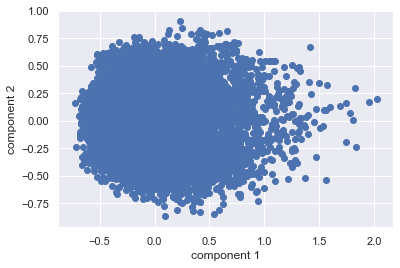

In [33]:
plt.scatter(features_2D[:, 0], features_2D[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2')

In [38]:
labelencoder = LabelEncoder()
color = labelencoder.fit_transform(labels)

[19 37 85 ...  3 75 28]


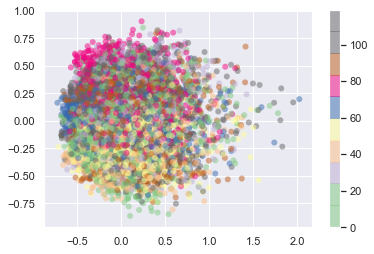

In [39]:
plt.scatter(features_2D[:, 0], features_2D[:, 1],
            c=color, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.colorbar()

## Kmeans

In [101]:
# Función para entrenar el modelo
def k_m(data_x, n, color):
    kmeans = KMeans(n_clusters=n, random_state=0).fit(data_x)
    clusters = kmeans.predict(data_x)
    centers = kmeans.cluster_centers_
    plt.scatter(data_x[:, 0], data_x[:, 1],
            c=color, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    return(clusters)

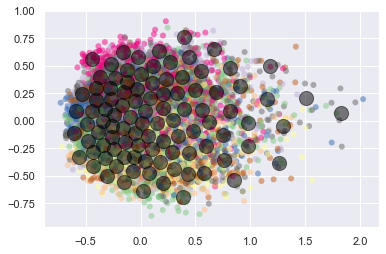

In [103]:
clusters = k_m(features_2D, 100, color)

## Comparación

Se toma de referencia la raza husky siberiano y se busca encontrar razas similares que se agrupen en la misma categoría tomando en cuenta la categoría que se asignó.

***
Se busca primero los indices en los que aparece "siberian_husky"

In [114]:
#similar = np.where((labels == "samoyed")|(labels == "siberian_husky"))
similar = np.where(labels == "siberian_husky")

In [116]:
valores, contador = np.unique(clusters[similar], return_counts=True)
print("Valores: "+str(valores))
print("Conteo: "+str(contador))

Valores: [ 1  2  3  4  7  9 16 17 18 24 33 36 39 42 45 48 56 58 59 61 62 66 69 72
 75 80 92 93 94 96 98]
Conteo: [ 1  2  3  1  2  1  4  3  4  3  1  1  6  2  1 14  2  1  3  7  1  6  3  2
  1  2  5  1  8  2  2]


In [117]:
valores[np.argmax(contador)]

48

Se puede apreciar que la categoría predominante es la 48.

***
Otra raza similar es el malute por lo que ahora se encontrará cúal es la categoría predominante

In [118]:
similar = np.where((labels == "malamute")|(labels == "siberian_husky"))

In [119]:
valores, contador = np.unique(clusters[similar], return_counts=True)
print("Valores: "+str(valores))
print("Conteo: "+str(contador))

Valores: [ 1  2  3  4  7  9 16 17 18 23 24 30 33 34 36 39 40 42 45 48 56 57 58 59
 61 62 66 69 72 75 80 92 93 94 96 98]
Conteo: [ 1  2  4  1  4  1 15  6 12  1  3  2  1  1  2  7  2  2  1 21  2  2  1  5
 14  1 15  4  2  3  6  8  2 14  5  3]


In [120]:
valores[np.argmax(contador)]

48

De nuevo la categoría predominante en la 48

***
Por último se incluirá al samoyedo que también comparten caracteristicas.

In [121]:
similar = np.where((labels == "malamute")|(labels == "siberian_husky")|(labels == "samoyed"))

In [122]:
valores, contador = np.unique(clusters[similar], return_counts=True)
print("Valores: "+str(valores))
print("Conteo: "+str(contador))

Valores: [ 1  2  3  4  5  7  8  9 14 16 17 18 23 24 28 29 30 33 34 36 39 40 42 45
 48 56 57 58 59 60 61 62 66 69 72 73 75 80 86 92 93 94 96 98 99]
Conteo: [ 1  2  9  1  1  4  1 12  2 15  6 12  1  3  1  1  5  7  1  2 10 12 12  1
 29  2  2  8  5  9 15  2 15  6  2  4  4  6  2 11  3 20 11  3  4]


In [123]:
valores[np.argmax(contador)]

48

### Conclusión

Mientras más se acerque al número real de catégorias la predicción se mejora.